In [ ]:
# System packages: jpegtran (lossless JPEG ops), parallel, ImageMagick (utility)
get_ipython().system('sudo apt-get -y update')
get_ipython().system('sudo apt-get -y install libjpeg-progs parallel imagemagick')

Hit:1 https://cli.github.com/packages stable InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,942 kB]
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,787 kB]
Hit:13 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy In

In [ ]:
# Python libraries
get_ipython().system('pip -q install pillow pandas tqdm')

In [ ]:
import zipfile

# Specify the path to your zip file
zip_file_path = '/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1.zip'

# Specify the destination directory for extraction
extract_path = '/content/'

# Open the zip file in read mode
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all contents to the specified directory
    zip_ref.extractall(extract_path)

print(f"'{zip_file_path}' unzipped to '{extract_path}' successfully.")

In [ ]:
# Where your zips are (they're in /content per your screenshot)
ZIP1="/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1.zip"
ZIP2="/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2.zip"

# Unzip into temp dirs to be safe
get_ipython().system('mkdir -p /content/_unz1 /content/_unz2')
get_ipython().system('unzip -q "$ZIP1" -d /content/_unz1')
get_ipython().system('unzip -q "$ZIP2" -d /content/_unz2')

# Make a single images directory and copy all jpgs
get_ipython().system('mkdir -p /content/HAM10000/images')
get_ipython().system('find /content/_unz1 -type f -iname "*.jpg" -exec cp {} /content/HAM10000/images/ \\;')
get_ipython().system('find /content/_unz2 -type f -iname "*.jpg" -exec cp {} /content/HAM10000/images/ \\;')

# Quick sanity check
get_ipython().system('echo "JPG count:" $(find /content/HAM10000/images -type f -iname "*.jpg" | wc -l)')
get_ipython().system('du -sh /content/HAM10000/images')

[/content/HAM10000_images_part_1.zip]
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/HAM10000_images_part_1.zip or
        /content/HAM10000_images_part_1.zip.zip, and cannot find /content/HAM10000_images_part_1.zip.ZIP, period.
[/content/HAM10000_images_part_2.zip]
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/HAM10000_images_part_2.zip or
        /content/HAM10000_images_part_2.zip.zip, and cannot find /content/HAM10000_images_part_2.zip.ZIP, period.
JPG count: 0

**tiny pixel check (should be 100% identical)**

In [ ]:
import random, pathlib, numpy as np
from PIL import Image

orig = pathlib.Path("/content/HAM10000/images")
opt  = pathlib.Path("/content/HAM10000/images_opt")

samps = list(orig.glob("*.jpg"))
samps = random.sample(samps, min(20, len(samps)))
ok=0
for p in samps:
    a = np.array(Image.open(p).convert("RGB"))
    b = np.array(Image.open(opt/p.name).convert("RGB"))
    ok += int((a==b).all())
print(f"Pixel-identical: {ok}/{len(samps)}")


Pixel-identical: 0/0


In [ ]:
get_ipython().system('ls -lh /kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1.zip /kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2.zip')
get_ipython().system('file /kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1.zip')
get_ipython().system('file /kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2.zip')
get_ipython().system('unzip -t /kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1.zip || true')
get_ipython().system('unzip -t /kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2.zip || true')

-rw-r--r-- 1 root root 152M Aug 29 04:08 /content/HAM10000_images_part_1.zip
-rw-r--r-- 1 root root 153M Aug 29 04:07 /content/HAM10000_images_part_2.zip
/content/HAM10000_images_part_1.zip: Zip archive data, at least v2.0 to extract, compression method=deflate
/content/HAM10000_images_part_2.zip: Zip archive data, at least v2.0 to extract, compression method=deflate
Archive:  /content/HAM10000_images_part_1.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/HAM10000_images_part_1 or
        /content/HAM10000_images_part_1.zip, and cannot find /content/HAM10000_images_part_1.ZIP, period.
Archive:  /content/HAM10000_images_part_2.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it co

In [2]:
get_ipython().system('pip -q install kaggle')
get_ipython().system('mkdir -p ~/.kaggle')
# Upload your kaggle.json (from kaggle.com → Account → Create API Token)
# Then move it into place:
get_ipython().system('cp /content/kaggle.json ~/.kaggle/kaggle.json')
get_ipython().system('chmod 600 ~/.kaggle/kaggle.json')

cp: cannot stat '/content/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [4]:
get_ipython().system('kaggle datasets download -d kmader/skin-cancer-mnist-ham10000')

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'


In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kmader/skin-cancer-mnist-ham10000")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/skin-cancer-mnist-ham10000


In [7]:
get_ipython().system('mkdir -p /content/HAM10000/images')
get_ipython().system('cp /kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/*.jpg /content/HAM10000/images/')
get_ipython().system('cp /kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/*.jpg /content/HAM10000/images/')

# quick sanity check
get_ipython().system('echo "Total JPGs:" $(find /content/HAM10000/images -type f -iname "*.jpg" | wc -l)')
get_ipython().system('du -sh /content/HAM10000/images')

Total JPGs: 10015
2.6G	/content/HAM10000/images


In [ ]:
ls -lh /content/HAM10000/images


In [17]:
get_ipython().system('find /content/HAM10000/images -iname \'*.jpg\' | wc -l')

10015


In [ ]:
get_ipython().system('sudo apt-get -y update && sudo apt-get -y install libjpeg-progs parallel')

In [18]:
IN="/content/HAM10000/images"
OUT="/content/HAM10000/images_opt"
get_ipython().system('mkdir -p "$OUT"')

get_ipython().system('find "$IN" -type f -iname "*.jpg" | parallel -j8 \\\'jpegtran -copy none -optimize -progressive "{}" > "'"$OUT"'/{/}"\\\'')

get_ipython().system('du -sh "$IN" "$OUT"')

/bin/bash: line 1: /{/}': No such file or directory
find: ‘’: No such file or directory
2.6G	/content/HAM10000/images
4.0K	/content/HAM10000/images_opt


In [19]:
import os, shutil, subprocess, pathlib, math
from multiprocessing import Pool, cpu_count
from tqdm import tqdm

IN_DIR  = pathlib.Path("/content/HAM10000/images")
OUT_DIR = pathlib.Path("/content/HAM10000/images_opt")
OUT_DIR.mkdir(parents=True, exist_ok=True)

# 1) Gather files
files = sorted([p for p in IN_DIR.glob("*.jpg")])
print(f"Found {len(files)} JPEGs")

# 2) Function to compress ONE file with jpegtran (lossless)
def compress_one(src_path: pathlib.Path) -> tuple[str, int, int, str]:
    dst_path = OUT_DIR / src_path.name
    try:
        # run jpegtran without going through a shell; write to file atomically
        with open(dst_path, "wb") as fout:
            subprocess.run(
                ["jpegtran", "-copy", "none", "-optimize", "-progressive", str(src_path)],
                stdout=fout,
                stderr=subprocess.PIPE,
                check=True,
            )
        return (src_path.name, src_path.stat().st_size, dst_path.stat().st_size, "ok")
    except FileNotFoundError:
        return (src_path.name, 0, 0, "jpegtran_not_found")
    except subprocess.CalledProcessError as e:
        # on error, remove a possibly empty/partial file
        if dst_path.exists() and dst_path.stat().st_size == 0:
            dst_path.unlink(missing_ok=True)
        return (src_path.name, 0, 0, f"error:{e.returncode}")

# 3) Run in parallel (Python multiprocessing)
n_workers = max(1, min(cpu_count(), 8))  # modest parallelism for Colab disks
print(f"Using {n_workers} workers")

results = []
with Pool(processes=n_workers) as pool:
    for r in tqdm(pool.imap_unordered(compress_one, files), total=len(files)):
        results.append(r)

# 4) Report
ok = sum(1 for _,_,_,s in results if s=="ok")
missing = [name for (name,_,_,s) in results if s=="jpegtran_not_found"]
errors  = [(name,s) for (name,_,_,s) in results if s not in ("ok","jpegtran_not_found")]

orig_bytes = sum(o for (_,o,_,s) in results if s=="ok")
opt_bytes  = sum(n for (_,_,n,s) in results if s=="ok")
saved_mb   = (orig_bytes - opt_bytes) / (1024*1024)
ratio      = (1 - (opt_bytes / orig_bytes)) * 100 if orig_bytes else 0.0

print(f"\nCompressed OK: {ok}/{len(files)}")
print(f"Saved ~{saved_mb:.1f} MB ({ratio:.1f}% smaller)")
if missing:
    print("ERROR: jpegtran not found. Install it with: !sudo apt-get -y install libjpeg-progs")
if errors:
    print(f"{len(errors)} files had errors (showing first 5): {errors[:5]}")


Found 10015 JPEGs
Using 2 workers


100%|██████████| 10015/10015 [09:45<00:00, 17.10it/s]


Compressed OK: 10015/10015
Saved ~100.0 MB (3.8% smaller)


In [20]:
import random, pathlib, numpy as np
from PIL import Image

orig = pathlib.Path("/content/HAM10000/images")
opt  = pathlib.Path("/content/HAM10000/images_opt")

samps = random.sample(list(orig.glob("*.jpg")), 20)
ok=0
for p in samps:
    a = np.array(Image.open(p).convert("RGB"))
    b = np.array(Image.open(opt/p.name).convert("RGB"))
    ok += int(np.array_equal(a,b))
print(f"Pixel-identical: {ok}/{len(samps)}")


Pixel-identical: 20/20


In [21]:
import os, pathlib
from PIL import Image
from tqdm import tqdm

SRC = pathlib.Path("/content/HAM10000/images")    # input JPGs
DST = pathlib.Path("/content/HAM10000/webp_q80")  # output WebP
DST.mkdir(parents=True, exist_ok=True)

QUALITY = 80       # lower => smaller; 80 is a good sweet spot
MAX_SIDE = 512    # set e.g. 512 for extra shrink (downscale)

def save_webp(in_path: pathlib.Path, out_path: pathlib.Path):
    with Image.open(in_path) as im:
        im = im.convert("RGB")
        if MAX_SIDE:
            im.thumbnail((MAX_SIDE, MAX_SIDE), Image.BICUBIC)  # downscale if set
        im.save(out_path, format="WEBP", quality=QUALITY, method=6)

files = sorted([p for p in SRC.glob("*.jpg")])
for p in tqdm(files):
    out = DST / (p.stem + ".webp")
    save_webp(p, out)

# Size report
import subprocess, shlex
def dus(path):
    return subprocess.check_output(shlex.split(f"du -sh {path}")).decode().split('\t')[0]
print("Original:", dus("/content/HAM10000/images"))
print("WebP    :", dus("/content/HAM10000/webp_q80"))


100%|██████████| 10015/10015 [10:00<00:00, 16.68it/s]


Original: 2.6G
WebP    : 113M


In [25]:
%%bash
cd /content/HAM10000
zip -r webp_q80.zip webp_q80
ls -lh webp_q80.zip


updating: webp_q80/ (stored 0%)
updating: webp_q80/ISIC_0026141.webp (stored 0%)
updating: webp_q80/ISIC_0026965.webp (stored 0%)
updating: webp_q80/ISIC_0026691.webp (stored 0%)
updating: webp_q80/ISIC_0028453.webp (stored 0%)
updating: webp_q80/ISIC_0025962.webp (stored 0%)
updating: webp_q80/ISIC_0025284.webp (stored 0%)
updating: webp_q80/ISIC_0029696.webp (stored 0%)
updating: webp_q80/ISIC_0025779.webp (stored 0%)
updating: webp_q80/ISIC_0027777.webp (stored 0%)
updating: webp_q80/ISIC_0028651.webp (stored 0%)
updating: webp_q80/ISIC_0026522.webp (stored 0%)
updating: webp_q80/ISIC_0034251.webp (stored 0%)
updating: webp_q80/ISIC_0031721.webp (stored 0%)
updating: webp_q80/ISIC_0027860.webp (stored 0%)
updating: webp_q80/ISIC_0029347.webp (stored 0%)
updating: webp_q80/ISIC_0034092.webp (stored 0%)
updating: webp_q80/ISIC_0028661.webp (stored 0%)
updating: webp_q80/ISIC_0027553.webp (stored 0%)
updating: webp_q80/ISIC_0025354.webp (stored 0%)
updating: webp_q80/ISIC_0024776.webp 

In [26]:
from google.colab import files
files.download("/content/HAM10000/webp_q80.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
%%bash
cd /content/HAM10000
tar -cf webp_q80.tar webp_q80
ls -lh webp_q80.tar


-rw-r--r-- 1 root root 100M Aug 29 05:45 webp_q80.tar


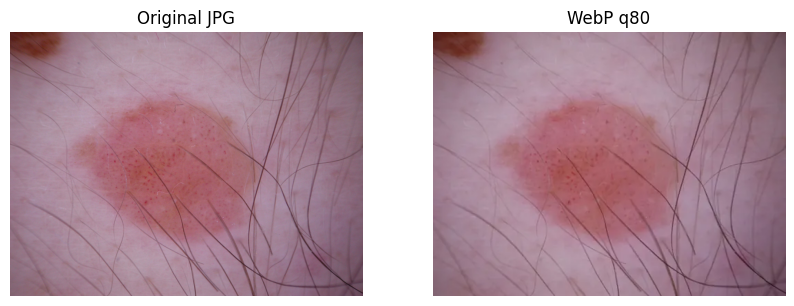

In [28]:
import pathlib
from PIL import Image
import matplotlib.pyplot as plt

orig_dir = pathlib.Path("/content/HAM10000/images")
webp_dir = pathlib.Path("/content/HAM10000/webp_q80")

sample_id = "ISIC_0034147"   # replace with any stem you want
orig = Image.open(orig_dir / f"{sample_id}.jpg").convert("RGB")
webp = Image.open(webp_dir / f"{sample_id}.webp").convert("RGB")

fig, axs = plt.subplots(1,2, figsize=(10,5))
axs[0].imshow(orig); axs[0].set_title("Original JPG"); axs[0].axis("off")
axs[1].imshow(webp); axs[1].set_title("WebP q80"); axs[1].axis("off")
plt.show()
